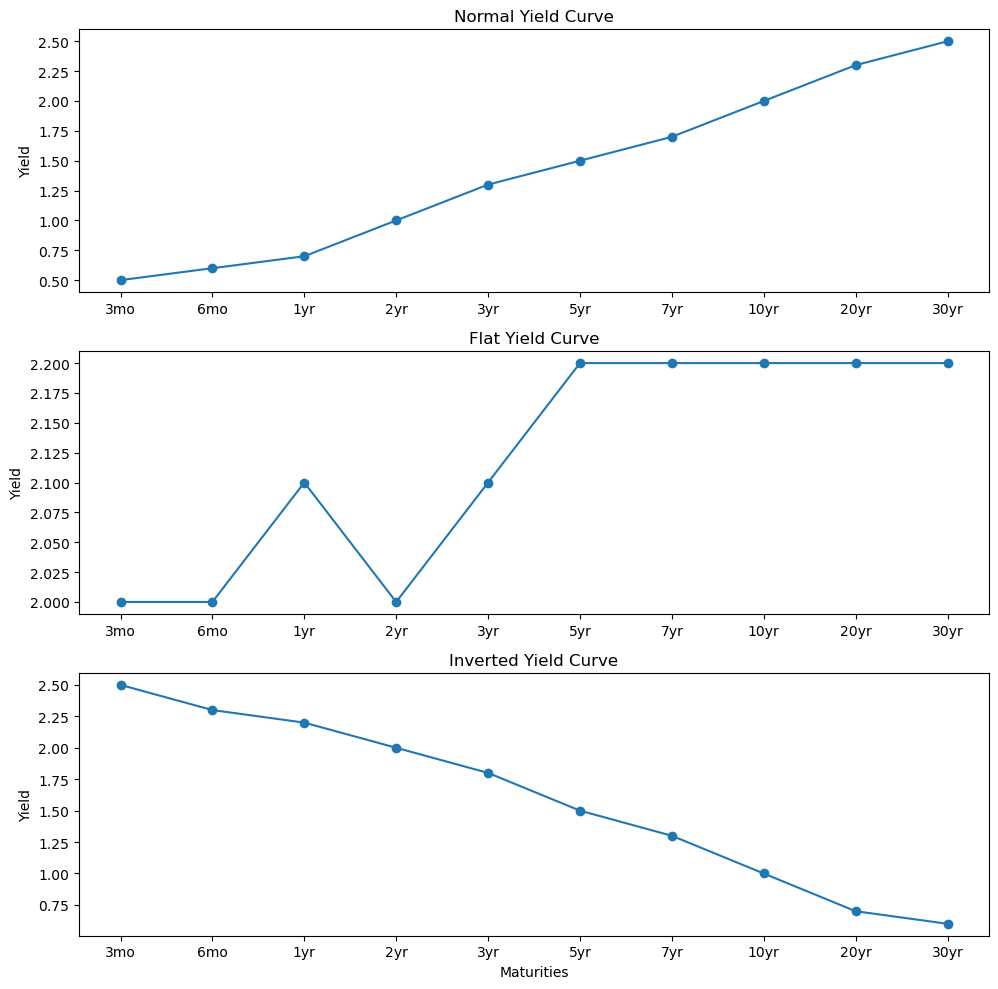

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# 构造数据
maturities = ['3mo', '6mo', '1yr', '2yr', '3yr', '5yr', '7yr', '10yr', '20yr', '30yr']

# 常规曲线
normal = [0.5, 0.6, 0.7, 1.0, 1.3, 1.5, 1.7, 2.0, 2.3, 2.5]
# 平坦曲线
flat = [2.0, 2.0, 2.1, 2.0, 2.1, 2.2, 2.2, 2.2, 2.2, 2.2]
# 倒挂曲线
inverted = [2.5, 2.3, 2.2, 2.0, 1.8, 1.5, 1.3, 1.0, 0.7, 0.6]

fig, axs = plt.subplots(3, figsize=(10, 10))  # 创建一个有3个子图的图

# 在第一个子图中画出常规收益率曲线，设置图的标题和轴标签
axs[0].plot(maturities, normal, marker='o')
axs[0].set(ylabel='Yield',title="Normal Yield Curve")


# 在第二个子图中画出平坦收益率曲线，设置图的标题和轴标签
axs[1].plot(maturities, flat, marker='o')
axs[1].set(ylabel='Yield',title="Flat Yield Curve")

# 在第三个子图中画出倒挂数率曲线，设置图的标题和轴标签
axs[2].plot(maturities, inverted, marker='o')
axs[2].set(xlabel='Maturities', ylabel='Yield', title="Inverted Yield Curve")

plt.tight_layout()
plt.show()




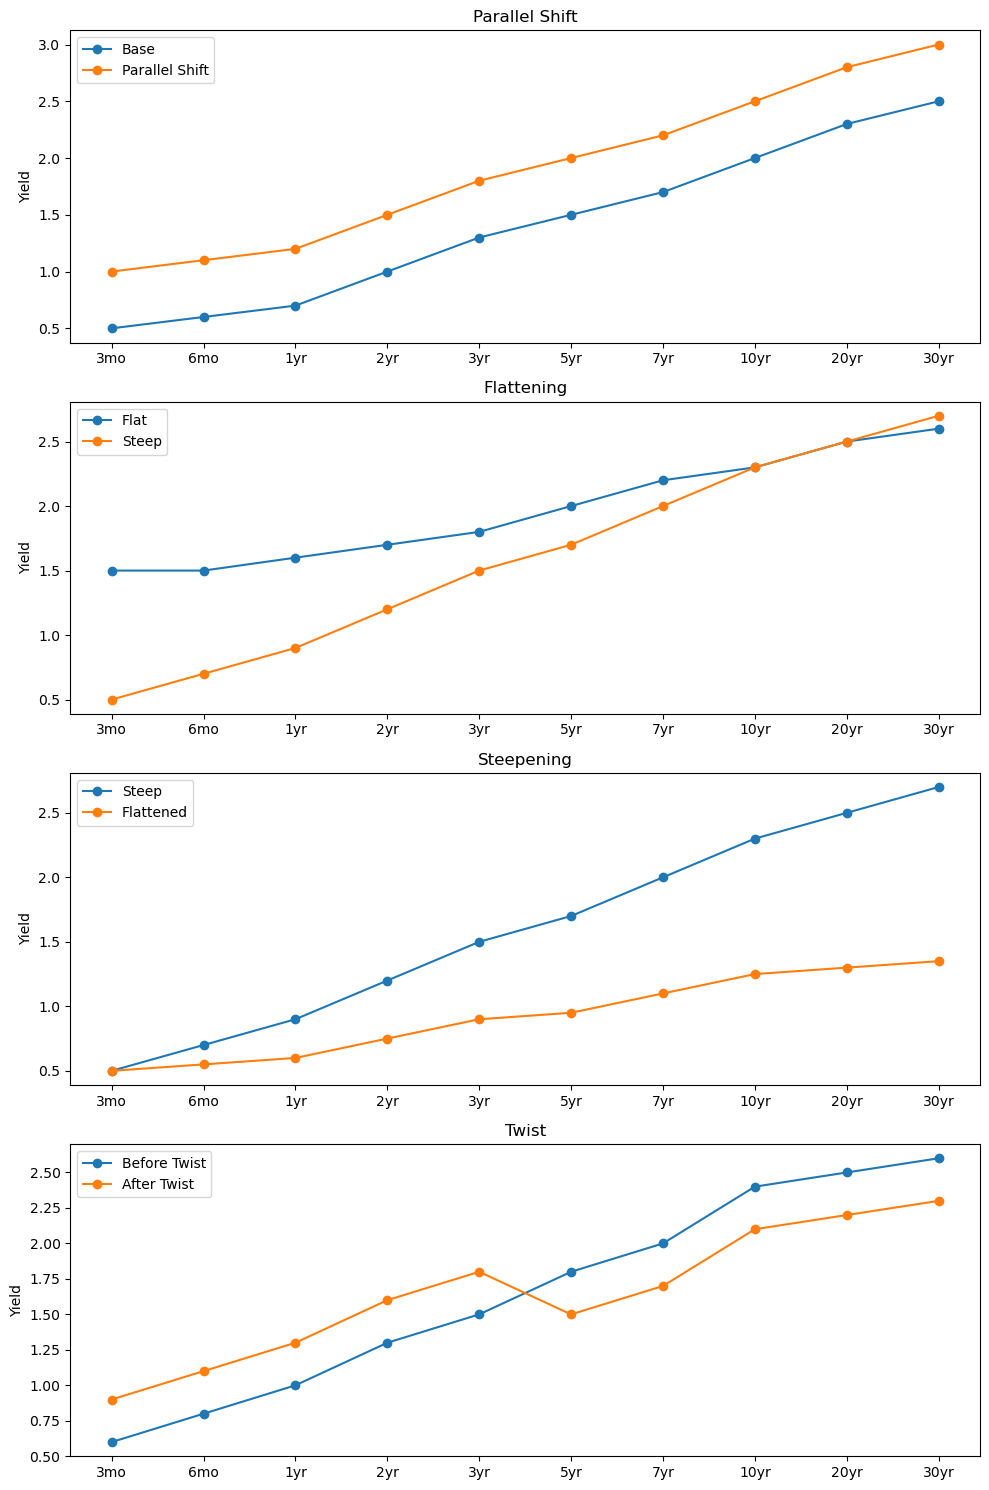

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# 构造数据
maturities = ['3mo', '6mo', '1yr', '2yr', '3yr', '5yr', '7yr', '10yr', '20yr', '30yr']

# 平行移动
yields_base = [0.5, 0.6, 0.7, 1.0, 1.3, 1.5, 1.7, 2.0, 2.3, 2.5]
yields_parallel_shift = [x + 0.5 for x in yields_base]  # 平行移动，将所有收益率上调0.5%

# 平坦变得更陡峭
yields_flat = [1.5, 1.5, 1.6, 1.7, 1.8, 2.0, 2.2, 2.3, 2.5, 2.6]
yields_steep = [x + 0.2*i for i,x in enumerate(yields_flat)]  # 值越大的期限的收益率改变越多

# 陡峭变得平坦
yields_steep = [0.5, 0.7, 0.9, 1.2, 1.5, 1.7, 2.0, 2.3, 2.5, 2.7]
yields_flattened = [x - 0.15*i for i,x in enumerate(yields_steep)]  # 值越大的期限的收益率改变越多

# 碟式变化
yields_initial = [0.6, 0.8, 1.0, 1.3, 1.5, 1.8, 2.0, 2.4, 2.5, 2.6]
yields_twist = [x + 0.3 if i<5 else x - 0.3 for i,x in enumerate(yields_initial)]  # 前半部分的收益率上升，后半部分的收益率下降

fig, axs = plt.subplots(4, figsize=(10, 15))  # 创建一个有4个子图的图

axs[0].plot(maturities, yields_base, marker='o',label="Base")
axs[0].plot(maturities, yields_parallel_shift, marker='o',label="Parallel Shift")
axs[0].set(ylabel='Yield',title="Parallel Shift")
axs[0].legend()

axs[1].plot(maturities, yields_flat, marker='o',label="Flat")
axs[1].plot(maturities, yields_steep, marker='o',label="Steep")
axs[1].set(ylabel='Yield',title="Flattening")
axs[1].legend()

axs[2].plot(maturities, yields_steep, marker='o',label="Steep")
axs[2].plot(maturities, yields_flattened, marker='o',label="Flattened")
axs[2].set(ylabel='Yield',title="Steepening")
axs[2].legend()

axs[3].plot(maturities, yields_initial, marker='o',label="Before Twist")
axs[3].plot(maturities, yields_twist, marker='o',label="After Twist")
axs[3].set(ylabel='Yield',title="Twist")
axs[3].legend()

plt.tight_layout()
plt.show()


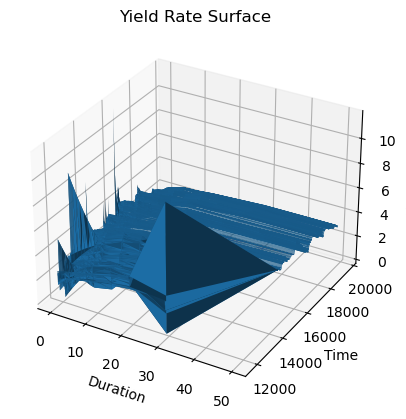

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
data = pd.read_csv('/Users/xiaoquanliu/Desktop/Book_DataCode/第三章/国债收益率曲线数据.csv')  # 将CSV文件加载到一个pandas DataFrame中，假设数据文件名为data.csv
dates = pd.to_datetime(data['date'])  # 将字符串日期转换为日期时间类型
time = mdates.date2num(dates)  # 将日期时间类型转换为数值型数据
duration = data['year']   # 年期列
yield_rate = data['yield']   # 收益率列
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(duration, time, yield_rate)
ax.set_xlabel('Duration')
ax.set_ylabel('Time')
ax.set_zlabel('Yield Rate')
ax.set_title('Yield Rate Surface')
plt.savefig('/Users/xiaoquanliu/Desktop/yield_rate_surface.png')  


In [4]:
# 导入需要的库
import numpy as np
import pandas as pd
import scipy.optimize as optimize

# 设置债券数据
face_value = 100
market_price = 90
coupon_rate = 0.08
market_rate = 0.09
payment_freq = 2
remaining_years = 2.5

# 计算每个付息期间的现金流量
cash_flows = [face_value * coupon_rate / payment_freq] * (int(remaining_years * payment_freq))
cash_flows[-1] += face_value

# 定义函数来计算债券价格
def bond_price(ytm):
    return np.sum([cf / ((1 + ytm/payment_freq) ** (i+1)) for i, cf in enumerate(cash_flows)])

# 使用scipy库中的optimize库来计算债券的YTM
ytm = optimize.newton(lambda y: bond_price(y) - market_price, 0.05)

# 计算债券的麦考利久期和凸性
macaulay_duration = np.sum([cf * (i+1) / bond_price(ytm) for i, cf in enumerate(cash_flows)])
convexity = np.sum([cf * (i+1) * (i+2) / bond_price(ytm) for i, cf in enumerate(cash_flows)]) / ((1 + ytm/payment_freq) ** 2)

# 输出结果
print("债券麦考利久期为：{:.2f}年".format(macaulay_duration/payment_freq))
print("债券凸性为：{:.2f}".format(convexity))


债券麦考利久期为：3.11年
债券凸性为：32.19
